
# Scrapey 🔍

##### With this tool you will be able to find out more about product info and reviews taking place in Amazon for specific electronic products

###### Libraries

In [1]:
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import csv
import requests
from requests import get
import numpy as np
import time
import random
import re
import json
import pprint
import sys
import os
import urllib.request

### Basic metrics about the input data

In [4]:
amazon_urls = pd.read_csv('./amazon_test_earphones.csv')

In [5]:
df_amazon = pd.DataFrame(amazon_urls)
urls_amazon = df_amazon['urls'].tolist()

In [6]:
print("Número total de URLs de Amazon:", len(urls_amazon))

Número total de URLs de Amazon: 3


In [7]:
#urls_amazon

### Empty lists to append with data

In [8]:
product_name = []
price_list = []
price_deal_list = []
rating_list = []
review_list = []
amazon_choice_list = []
amazon_seller_list = []
stock_status = []
asin_list = []
date_since = []
ranking_list = []
review_text_list = []

## Scraper to get the following info:

##### 🛒 The following script will retrieve data from Amazon related to product name, price, rating, reviews, amazon's choice (Y/N), stock/out of stock, ASIN, product available since, ranking within Amazon Electronics, and to get the review texts by customers to perform a sentiment analysis.

In [9]:
def data_amazon(i, product_name, price_list, price_deal_list, rating_list, review_list, amazon_choice_list, stock_status, asin_list, ranking_list, date_since, review_text_list):    
    user_agent_list = [
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36']
    #Use headers randomly
    user_agent = random.choice(user_agent_list)
    headers = {'User-Agent': user_agent}
    
    print("Getting data from Amazon...")
    
    #assign time sleep in order to perform requests randomly
    time.sleep(random.randint(60, 140))
    
    #if page.status_code!=200:
    #raise ValueError('captha')
    
    response = requests.get(i, headers=headers)
    soup = BeautifulSoup(response.content, "lxml")

    #title data
    try:
        name = soup.find(id="productTitle").text
        name_clean = re.sub(r'\n', "", name)
        product_name.append(name_clean)
    except Exception:
        product_name.append("N/A")

    #price data
    try:
        price = soup.find(id="priceblock_ourprice").text
        price_clean = re.sub(r'\xa0€', '', price)
        price_list.append(price_clean)
    except Exception:
        price_list.append("N/A")
        
    try:
        price_deal = soup.find(id="priceblock_dealprice").text
        price_clean_deal = re.sub(r'\xa0€', '', price_deal)
        price_deal_list.append(price_clean_deal)
    except Exception:
        price_deal_list.append("Not in offer")

    #rating data
    try: 
        rating = soup.find("span", {"data-hook": "rating-out-of-text"}).text
        rating_clean = re.sub(r' de 5', "", rating)
        rating_list.append(rating_clean)
    except Exception:
        rating_list.append("N/A")

    #review data
    try:
        review = soup.find(id="acrCustomerReviewText").text
        review_clean = re.sub(r' valoraciones', "", review)
        review_list.append(review_clean)
    except Exception:
        review_list.append("N/A")

    #perform try-except in order to get status of amazon choice per product
    try:
        amazon_choice = soup.find("span", {"class": "ac-badge-rectangle"})
        children_choice = amazon_choice.find("span", recursive=False)
        amazon_choice_list.append("Yes")
    except Exception:
        amazon_choice_list.append("No")

    stock = soup.find(id="availability").text
    stock_clean = re.sub(r'\n', "", stock)
    stock_clean_final = re.sub(r'k.', "k", stock_clean)
    stock_status.append(stock_clean_final)

    try:
        table = soup.find('table', {'id': 'productDetails_detailBullets_sections1'})
        children = table.findAll("td", recursive=True)
        asin = children[0].text
        asin_clean = re.sub(r'\n', "", asin)
        asin_list.append(asin_clean)
    except Exception:
        asin_list.append("N/A")
    
    try:
        ranking = children[2].text
        ranking_clean = re.split('\n', ranking)
        ranking_clean_a = ranking_clean[2]
        ranking_str = str(ranking_clean_a)
        clean_ranking_str = re.sub("                                              ranking\n0  |Ver el Top 100 en Electrónica", "", ranking_str)
        final_clean_ranking = clean_ranking_str.replace(' ()', "")
        ranking_list.append(final_clean_ranking)
        
        try:
            date = children[4].text
            date_clean = re.sub(r'\n', "", date)
            date_since.append(date_clean) 
        except Exception:
            date_other = children[3].text
            date_other_clean = re.sub(r'\n', "", date_other)
            date_since.append(date_other_clean)
    except Exception:
        ranking_list.append("N/A")
        date_since.append("N/A")
   
    #getting review text from main reviews
    review_final_test = soup.findAll("div", {"data-hook":"review-collapsed"})
    
    aux_review_list = []
    for i in range(len(review_final_test)):
        
        span_rev = review_final_test[i].findAll("span", recursive=True)
        valor = span_rev[0].text
        aux_review_list.append(valor)
        clean = [s.replace("\n  ", '') for s in aux_review_list]
        clean_final = [s.replace("\n", '') for s in clean]
        clean_final_fnl = [s.replace('"\xa0', "") for s in clean_final]
        tostr = ' '.join(map(str, clean_final_fnl))
    review_text_list.append(tostr)
    
    #analysing and filtering data
    
        
    print("Data retrieved for:", name_clean, "🎉")

In [ ]:
for i in urls_amazon:
    data_amazon(i, product_name, price_list, price_deal_list, rating_list, review_list, amazon_choice_list, stock_status, asin_list, ranking_list, date_since, review_text_list)

In [11]:
df_amazon = pd.DataFrame(
    {'url': urls_amazon,
     'price': price_list,
     'price_deal': price_deal_list,
     'product_name': product_name,
     'rating': rating_list,
     'review': review_list,
     'amazon_choice': amazon_choice_list,
     'stock_info': stock_status,
     'asin': asin_list,
     'ranking_electronica': ranking_list,
     'date_since': date_since,
     'review_text': review_text_list,
    })

In [13]:
df_amazon.to_csv('./scrapey_earphones.csv')

## Sentiment analysis:

##### 😊😥 The following script will analyse the sentiment of each of the products in order to asign a variable and classify the products in accordance to their rating score and the overall sentiment scored after analysing the customer's product opinions

In [ ]:
#importing libraries
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import statistics
import nltk

In [3]:
df_amazon = pd.read_csv('./scrapey_soundbars.csv')

In [4]:
df_amazon

,Unnamed: 0,url,price,price_deal,product_name,rating,review,amazon_choice,stock_info,asin,ranking,date_since,review_text
0,0,https://www.amazon.es/Barra-Sonido-Samsung-HW-...,NaN,Not in offer,"Barra de Sonido SAMSUNG HW-Q60T - Sonido 360W,...",4,6,No,Disponible a través de estos vendedores.,NaN,NaN,NaN,A salido muy malo el subbofer solo hace ruidos...
1,1,https://www.amazon.es/Barra-Sonido-Samsung-HW-...,"169,15",Not in offer,"Samsung HW-T450 - Barra de Sonido, Sonido 200W...","4,2",32,Yes,En stock,NaN,NaN,NaN,La recomiendo. Buen sonido y fácil uso. Tengo ...
2,2,https://www.amazon.es/Barra-Sonido-Samsung-HW-...,"255,75",Not in offer,"Barra de Sonido Samsung HW-T550 - Sonido 320W,...","4,2",32,No,Este producto saldrá a la venta el 3 de marzo ...,NaN,NaN,NaN,La recomiendo. Buen sonido y fácil uso. Tengo ...
3,3,https://www.amazon.es/Barra-Sonido-SAMSUNG-HW-...,NaN,Not in offer,"Barra de Sonido SAMSUNG HW-T420 - Sonido 150W,...","4,2",32,No,Disponible a través de estos vendedores.,NaN,NaN,NaN,La recomiendo. Buen sonido y fácil uso. Tengo ...
4,4,https://www.amazon.es/Barra-Sonido-SAMSUNG-HW-...,"109,65",Not in offer,Barra de Sonido SAMSUNG HW-T400/ZF - Sonido 2....,"4,2",32,No,En stock,NaN,NaN,NaN,La recomiendo. Buen sonido y fácil uso. Tengo ...
5,5,https://www.amazon.es/Samsung-HW-Q60R-subwoofe...,NaN,Not in offer,Barra de Sonido Samsung | Harman Kardon HW-Q60...,"4,5",182,No,No disponible.,B07Q6NVN3G,"nº22,350 en Electrónica",29 marzo 2019,Impresionante barra de sonido ya suena bien si...
6,6,https://www.amazon.es/Samsung-HW-Q70R-Subwoofe...,NaN,Not in offer,Barra de Sonido Samsung | Harman Kardon HW-Q70...,"4,1",15,No,No disponible.,NaN,NaN,NaN,un producto recomendado para los que buscan un...
7,7,https://www.amazon.es/Samsung-HW-Q90R-Subwoofe...,NaN,Not in offer,Barra de Sonido Samsung | Harman Kardon HW-Q90...,5,4,No,No disponible.,B07Q4F8Z3Z,"nº177,195 en Electrónica",29 marzo 2019,1-la mejor barra de sonido casi con seguridad....
8,8,https://www.amazon.es/Barra-Sonido-Samsung-HW-...,"157,01",Not in offer,Samsung HW-R450 - Barra de Sonido 2.1ch 200W H...,"4,4",350,No,Sólo queda(n) 1 en stock,NaN,NaN,NaN,"Para escuchar música Mejor de lo que esperaba,..."
9,9,https://www.amazon.es/Samsung-HW-R550-subwoofe...,NaN,Not in offer,Barra de Sonido Samsung HW-R550 2.1Ch 320W con...,"4,4",71,No,Disponible a través de estos vendedores.,B07Q7SNXZM,"nº14,753 en Electrónica",29 marzo 2019,Muy facil de istalarMe esperaba más siendo del...


In [16]:
reviews = df_amazon[['review_text']]

In [17]:
#pd.options.display.max_colwidth = 50000

In [18]:
products_list = reviews.values.tolist()

In [19]:
#0. All words to lower

products_list_one = products_list[11]
review_lower = [item.lower() for item in products_list_one]

In [24]:
#1. Tokenize text
import nltk
from nltk.tokenize import word_tokenize 

nltk_tokens = nltk.word_tokenize(str(review_lower))

In [ ]:
#2. Filter all none Spanish words
from language_detector import detect_language
from nltk.corpus import stopwords

spanish_sent = []

for i in nltk_tokens:
    if detect_language(i) =='Spanish':
        print(i)
        spanish_sent.append(i)

In [11]:
# 3. Get only words
from nltk.corpus import stopwords

word_list_only = []

for i in nltk_tokens:
    regex = re.findall(r'\w+', i)
    no_numbers = [x for x in regex if not any(x1.isdigit() for x1 in x)]
    word_list_only.append(no_numbers)

In [12]:
clean_var_final = ''

for i in word_list_only:
    for e in i:
        if len(e) > 3:
            clean_var_final +=e + ' '

In [13]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

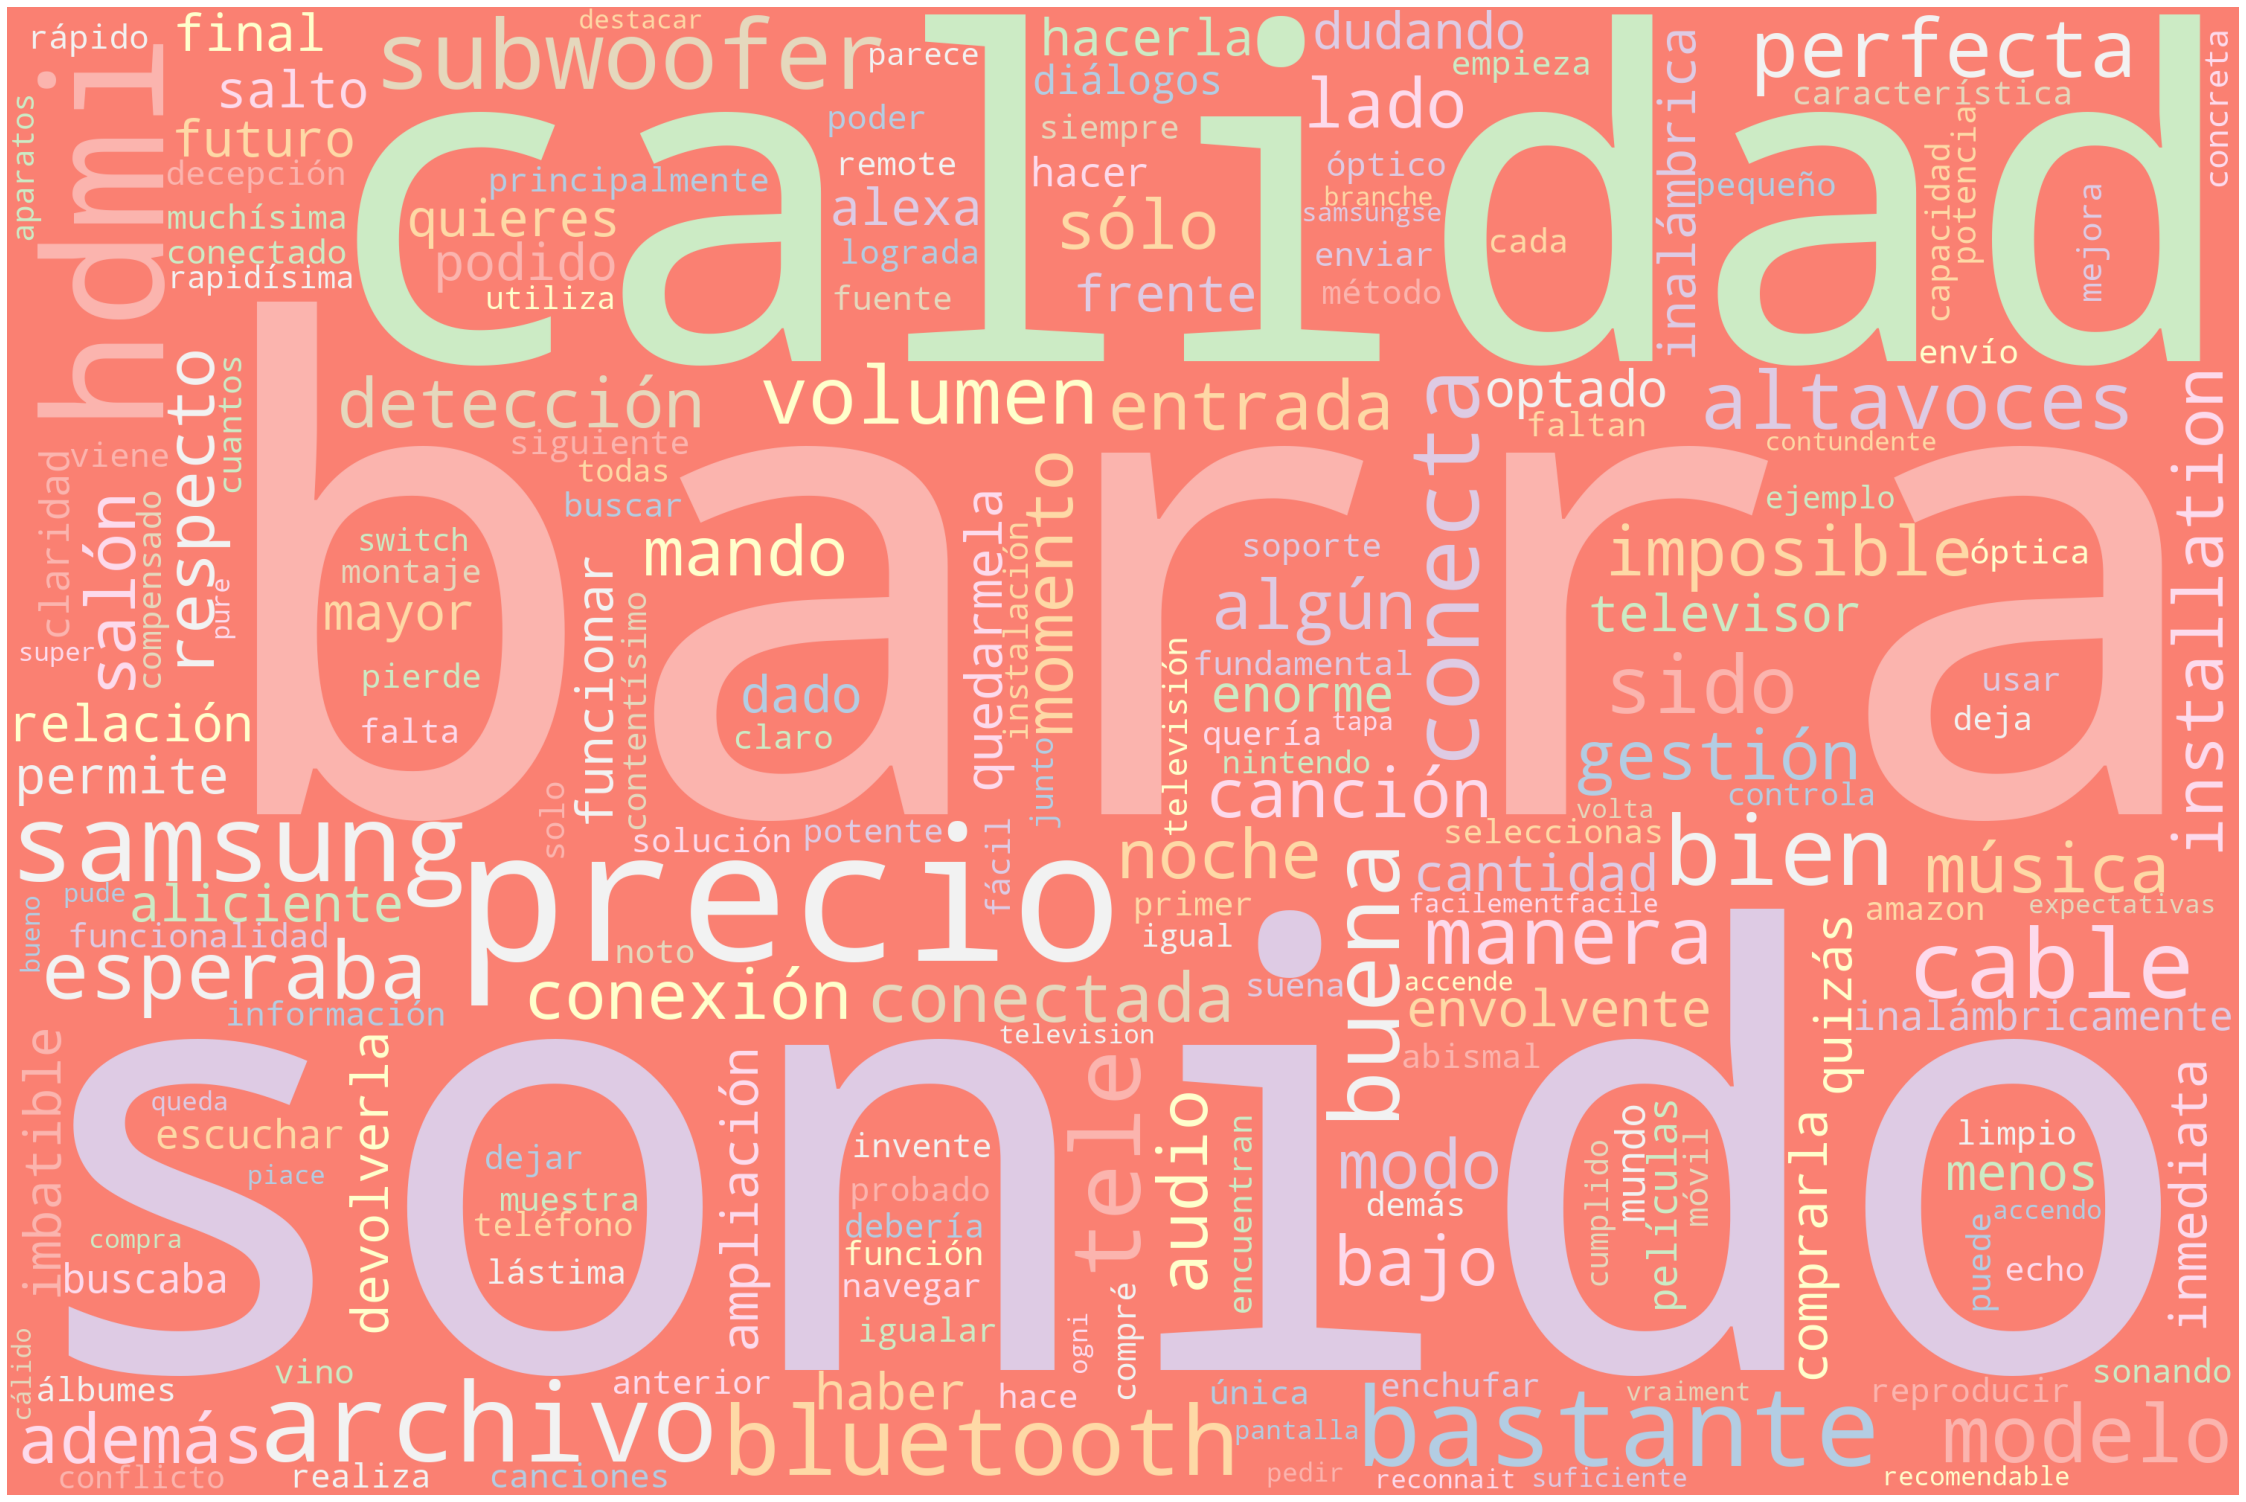

In [14]:
# Import package
from wordcloud import WordCloud
STOPWORDS = set(stopwords.words('spanish')) 

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(clean_var_final)
plot_cloud(wordcloud)

This a bert-base-multilingual-uncased model finetuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish and Italian. It predicts the sentiment of the review as a number of stars (between 1 and 5).

In [15]:
nld_model = 'nlptown/bert-base-multilingual-uncased-sentiment'
tokenizer = AutoTokenizer.from_pretrained(nld_model)
model = AutoModelForSequenceClassification.from_pretrained(nld_model)

# Classifier
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [39]:
nltk_sent = nltk.sent_tokenize(str(review_lower))

In [40]:
sent_list_final = []

for i in nltk_sent:
    sent_list_final.append(i)

In [41]:
reviews_str = sent_list_final
n = 1700
split_strings = [reviews_str[index : index + n] for index in range(0, len(reviews_str), n)]

In [42]:
len(reviews_str)

34

In [61]:
final_result_list = []

for i in reviews_str:
    results = classifier(i)
    final_result_list.append(results)

In [62]:
final_result_list

[[{'label': '5 stars', 'score': 0.44963061809539795}],
 [{'label': '5 stars', 'score': 0.6211563348770142}],
 [{'label': '5 stars', 'score': 0.45067575573921204}],
 [{'label': '1 star', 'score': 0.8196014761924744}],
 [{'label': '5 stars', 'score': 0.39898398518562317}],
 [{'label': '3 stars', 'score': 0.3949836492538452}],
 [{'label': '4 stars', 'score': 0.41673892736434937}],
 [{'label': '3 stars', 'score': 0.26792383193969727}],
 [{'label': '2 stars', 'score': 0.3907157778739929}],
 [{'label': '4 stars', 'score': 0.2703830897808075}],
 [{'label': '2 stars', 'score': 0.4944041073322296}],
 [{'label': '1 star', 'score': 0.6514379382133484}],
 [{'label': '1 star', 'score': 0.3824021518230438}],
 [{'label': '2 stars', 'score': 0.4538792371749878}],
 [{'label': '2 stars', 'score': 0.47934606671333313}],
 [{'label': '1 star', 'score': 0.44716599583625793}],
 [{'label': '5 stars', 'score': 0.824113130569458}],
 [{'label': '5 stars', 'score': 0.592721700668335}],
 [{'label': '5 stars', 'sco

In [71]:
star_result = []

for i in final_result_list:
    var_aux = i[0]['label']
    star_result.append(var_aux)

In [ ]:
star_result

In [77]:
label_list = [s.strip(' stars') for s in star_result]

In [78]:
int_list = []

for i in label_list:
    int_aux = int(i)
    int_list.append(int_aux)

In [80]:
star_df = statistics.median(int_list)

In [ ]:
df_amazon_sentiment = pd.DataFrame(
    {'url': urls_amazon,
     'price': price_list,
     'product_name': product_name,
     'rating': rating_list,
     'review': review_list,
     'amazon_choice': amazon_choice_list,
     'stock_info': stock_status,
     'asin': asin_list,
     'ranking': ranking_list,
     'date_since': date_since,
     'review_text': review_text_list,
     'sentiment_star': star_df,
    })

In [29]:
df_amazon_sentiment

url  \
0              https://www.amazon.es/Samsung-32T4305-2020-Resoluci%C3%B3n-Compatible/dp/B083T1HSL2/ref=sr_1_1?dchild=1&keywords=television+samsung&qid=1603302390&sr=8-1   
1  https://www.amazon.es/Syma-S107G-Helic%C3%B3ptero-giroscopio-color/dp/B00G9XZ2WI/ref=sr_1_4?dchild=1&keywords=helicopteros+teledirigidos&qid=1603302352&s=toys&sr=1-4   

    price  \
0  220,99   
1   25,99   

                                                                                                                           product_name  \
0  Samsung 32T4305 2020 - Smart TV de 32" con Resolución HD, HDR, PurColor, Ultra Clean View y Compatible con Asistentes de Voz (Alexa)   
1                                                                              Syma-S107G Helicóptero con giroscopio, Color Rojo (5090)   

  rating review amazon_choice stock_info        asin  \
0    4,4    509            No   En stock         N/A   
1      4    552            No   En stock  B00G9XZ2WI   

                                                              ranking  \
0                                                                 N/A   
1  nº4,220 en Juguetes y juegos (Ver el Top 100 en Juguetes y juegos)   

         date_since  \
0               N/A   
1  5 noviembre 2015   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
df_amazon_sentiment.to_csv('/sentiment_scoring_prueba.csv')